In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv



<font size="5">**Customer churn rate** is the defined as the rate at which customer are leaving the bank.</font>

<font size="4">Churn rate is calculated by using the following formula:</font>

<font size="4">*Churn rate = (Customer at the beginning of the month - Customer at the end of the month)/(Customer at the beginning of the month)*</font>




<font size="5">*Importing required libraries*</font>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pickle
import requests
import json
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(8,6)})


In [3]:
data=pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df=data.copy()
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



<font size="5">*Removing unnecessary columns*</font>

In [6]:
df.drop(['customer_id'],axis=1,inplace=True)

<AxesSubplot:>

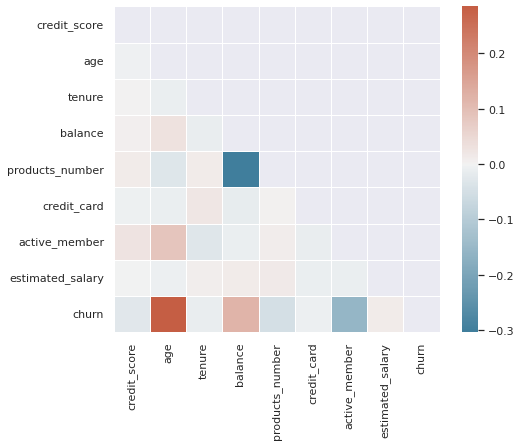

In [7]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask,linewidth=0.5,square=True,center=0)

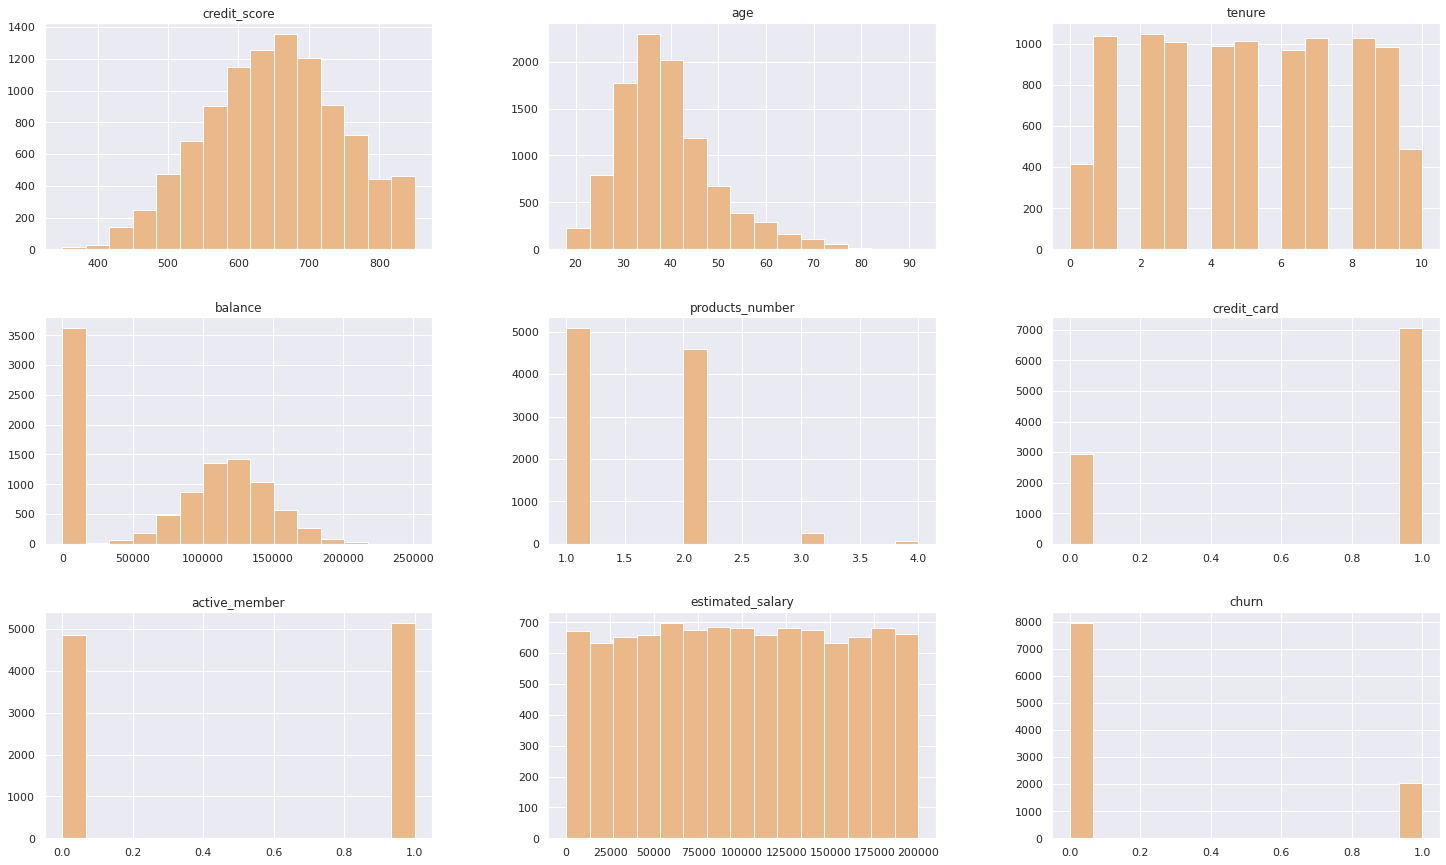

In [8]:
color = '#eab889'
df.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

In [9]:
a=(df['balance']==0).value_counts()
a=pd.DataFrame(a)
a=a['balance'].sort_values(ascending=True)
# a=a.head(1)
b=a[0]+a[1]
c=(df['credit_card']==0).value_counts()
c=pd.DataFrame(c)
c=c['credit_card'].sort_values(ascending=True)
# a=a.head(1)
d=c[0]+c[1]
e=(df['active_member']==0).value_counts()
e=pd.DataFrame(e)
e=e['active_member'].sort_values(ascending=True)
# a=a.head(1)
f=e[0]+e[1]

fig = go.Figure(data=[go.Table(
                                
                                header=dict(values=['Percentage of Customers having non zero Balance',
                                                    'Percentage of Customers having credit card','Percentage of Active Cusotmers'],
                                line_color='#010101',
                                fill_color='#464a3f',line_width=2,
                                align='center',
                                font=dict(color="white", size=20)),
    
                                cells=dict(values=[(a[0]/b)*100,(c[0]/b)*100,(e[0]/b)*100],
                                fill_color='#edef54',line_color='#010101',line_width=2,
                                           align='center',
                                font=dict(color="#1f1f1f", size=20),height=40)
)])

fig.update_layout(width=1000, height=400,font=dict(
        family="Courier New, monospace"))
fig.show()

In [10]:
import plotly.graph_objects as go
colors = ['darkorange', 'lightgreen']
df1=df['gender'].value_counts()
fig = go.Figure(data=[go.Pie(labels=df1.index,values=df1.values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='#000000', width=5)))
fig.update_layout(
    autosize=False,
    width=900,
    height=500,font=dict(
        family="Courier New, monospace",
        size=20,
        color="#0c0b0c"),

    title_text='Gender Distribution')
fig.show()

In [11]:

import plotly.graph_objects as go
colors = ['mediumturquoise', 'green', 'lightgreen']
df1=df['country'].value_counts()
fig = go.Figure(data=[go.Pie(labels=df1.index,values=df1.values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='#000000', width=5)))
fig.update_layout(autosize=False,
    width=900,
    height=500,font=dict(
        family="Courier New, monospace",
        size=20,
        color="#0c0b0c"),

    title_text='Client Distribution across the countries')
fig.show()



In [12]:
fig = px.box(df, y="credit_score")
fig.update_layout(
    autosize=False,
    width=900,
    height=500,
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=50,
        pad=1
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(jitter=0,    name="Suspected Outliers",
    boxpoints='suspectedoutliers',
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)')
fig.update_layout(
    height=500,font=dict(
        family="Courier New, monospace",
        size=18,
        color="#0c0b0c"),

    title_text='Distribution of credit score')
fig.show()

In [13]:
fig = px.box(df, y="age")
fig.update_layout(
    autosize=False,
    width=900,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(jitter=0,name="Suspected Outliers",
    boxpoints='suspectedoutliers',
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)')
fig.update_layout(
    height=500,font=dict(
        family="Courier New, monospace",
        size=18,
        color="#0c0b0c"),

    title_text='Distribution of age')
fig.show()

In [14]:
fig = px.box(df, y="tenure")
fig.update_layout(
    autosize=False,
    width=900,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces( jitter=0,name="Suspected Outliers",
    boxpoints='suspectedoutliers',
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)')
fig.update_layout(
    height=500,font=dict(
        family="Courier New, monospace",
        size=18,
        color="#0c0b0c"),

    title_text='Distribution of tenure')
fig.show()

In [15]:
fig = px.box(df, y="balance")
fig.update_layout(
    autosize=False,
    width=900,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces( jitter=0,name="Suspected Outliers",
    boxpoints='suspectedoutliers',
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)')
fig.update_layout(
    height=500,font=dict(
        family="Courier New, monospace",
        size=18,
        color="#0c0b0c"),

    title_text='Distribution of balance')
fig.show()

In [16]:
fig = px.box(df, y="products_number")
fig.update_layout(
    autosize=False,
    width=900,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(jitter=0,name="Suspected Outliers",
    boxpoints='suspectedoutliers',
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)')
fig.update_layout(
    height=500,font=dict(
        family="Courier New, monospace",
        size=18,
        color="#0c0b0c"),

    title_text='Distribution of number of products bought by the customer ')
fig.show()

In [17]:
df = pd.get_dummies(df, columns = ['gender','country'])
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.33,random_state=42)

for train_index, test_index in split.split(df, df['churn']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]



In [19]:
def data_transformations(data):
        if 'churn' in data.columns:
            labels=data['churn']
            data=data.drop('churn', axis=1)
        else:
            labels=None
    
        
        from sklearn.preprocessing import StandardScaler
        scaler=StandardScaler()
        data_scaled=scaler.fit_transform(data.select_dtypes(include=[np.number]))
        
        #output=np.hstack([data_scaled,data_cat_1hot])
        output=np.hstack([data_scaled,data.select_dtypes(exclude=[np.number])])
        
        return output, labels
        
        
        
        

In [20]:
train_data, train_labels = data_transformations(strat_train_set)


In [21]:
test_data, test_labels =data_transformations(strat_test_set)


<font size="5">***Logistic Regression***</font>

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(train_data,train_labels)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [23]:
yhat = LR.predict(test_data)

In [24]:
yhat_prob = LR.predict_proba(test_data)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(test_labels, yhat, labels=[1,0]))

[[ 125  547]
 [  74 2554]]


Confusion matrix, without normalization
[[ 125  547]
 [  74 2554]]


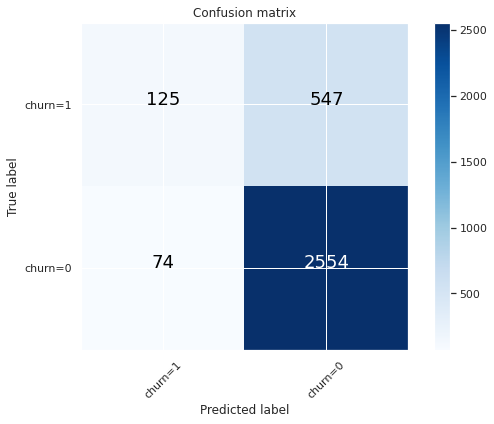

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')


<font size="5">***Decision Tree***</font>

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=1)
tree_clf.fit(train_data,train_labels)

yhat1 = tree_clf.predict(test_data)

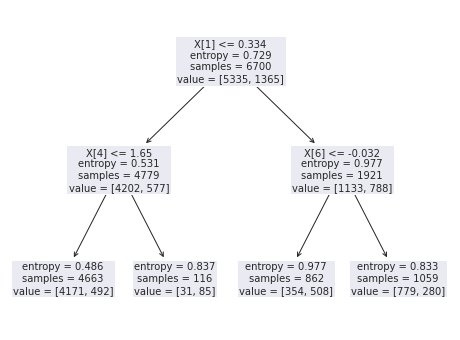

In [28]:
tree.plot_tree(tree_clf);

In [29]:


#del final_fi

# Calculating FI
for i, column in enumerate(df.drop('churn', axis=1)):
    print('Importance of feature {}: {:.3f}'.format(column, tree_clf.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [tree_clf.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi



Importance of feature credit_score: 0.000
Importance of feature age: 0.590
Importance of feature tenure: 0.000
Importance of feature balance: 0.000
Importance of feature products_number: 0.220
Importance of feature credit_card: 0.000
Importance of feature active_member: 0.190
Importance of feature estimated_salary: 0.000
Importance of feature gender_Female: 0.000
Importance of feature gender_Male: 0.000
Importance of feature country_France: 0.000
Importance of feature country_Germany: 0.000
Importance of feature country_Spain: 0.000


,index,Variable,Feature Importance Score
0,1,age,0.589959
1,4,products_number,0.220039
2,6,active_member,0.190001
3,0,credit_score,0.000000
4,2,tenure,0.000000
5,3,balance,0.000000
6,5,credit_card,0.000000
7,7,estimated_salary,0.000000
8,8,gender_Female,0.000000
9,9,gender_Male,0.000000


In [30]:
yhat_proba=tree_clf.predict_proba(test_data)

Confusion matrix, without normalization
[[ 304  368]
 [ 181 2447]]


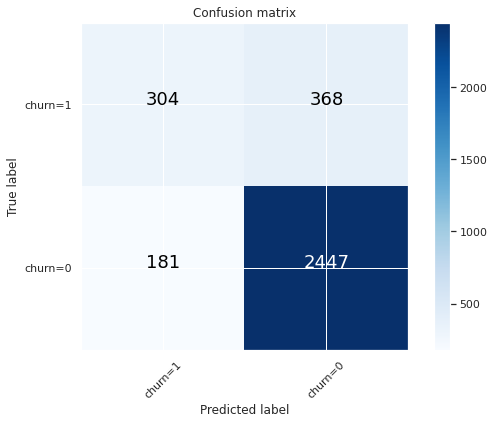

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, yhat1, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')


<font size="5">***Random Forest***</font>

In [32]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf=RandomForestClassifier(n_estimators=100,criterion='entropy')
rnd_clf.fit(train_data,train_labels)

RandomForestClassifier(criterion='entropy')

In [33]:
y_pred_rf=rnd_clf.predict(test_data)

In [34]:
yhat_proba_rnd=rnd_clf.predict_proba(test_data)


Confusion matrix, without normalization
[[ 311  361]
 [  98 2530]]


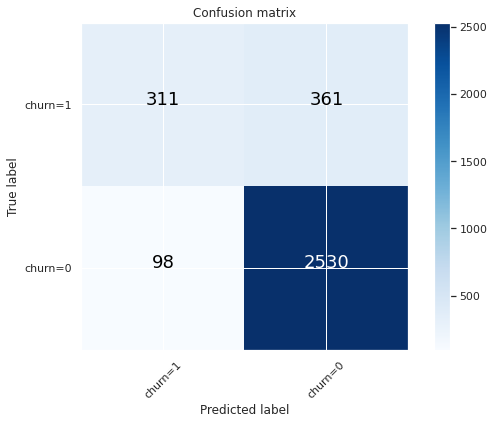

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, y_pred_rf, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')


<font size="5">***XGBoost***</font>

Classification accuracy on test set with max features = 1 and max_depth = None: 0.850
Confusion matrix, without normalization
[[2539   89]
 [ 406  266]]
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.796
Confusion matrix, without normalization
[[2628    0]
 [ 672    0]]
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.796
Confusion matrix, without normalization
[[2628    0]
 [ 672    0]]
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.800
Confusion matrix, without normalization
[[2628    0]
 [ 660   12]]
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.808
Confusion matrix, without normalization
[[2627    1]
 [ 632   40]]
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.857
Confusion matrix, without normalization
[[2529   99]
 [ 372  300]]
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.805
Confu

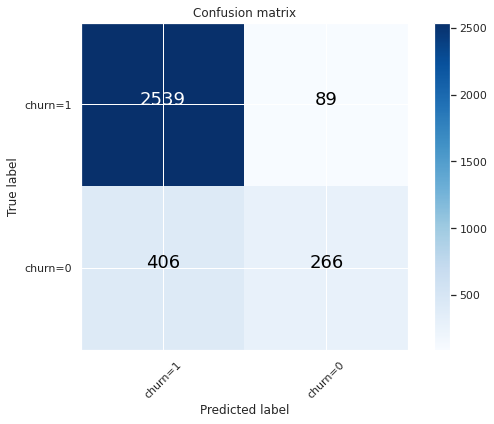

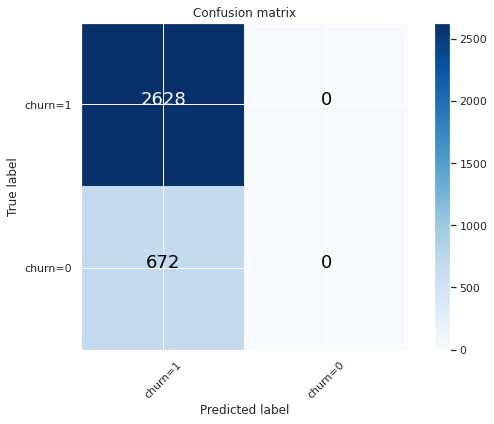

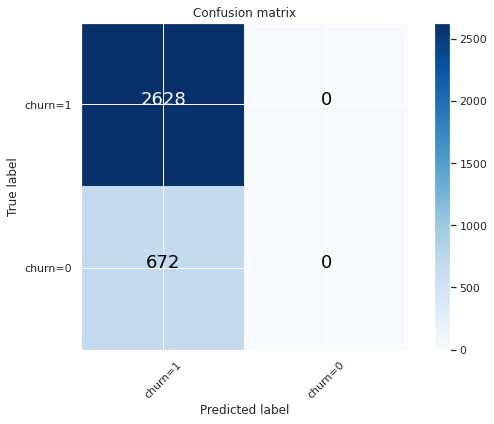

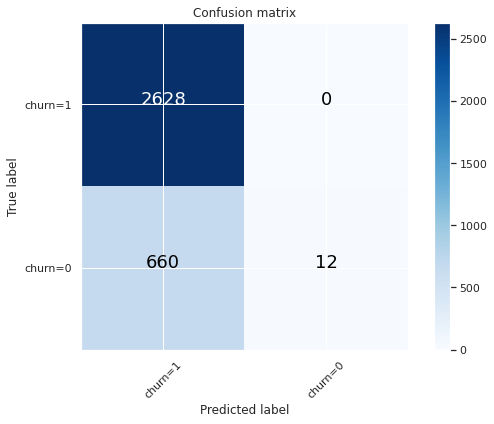

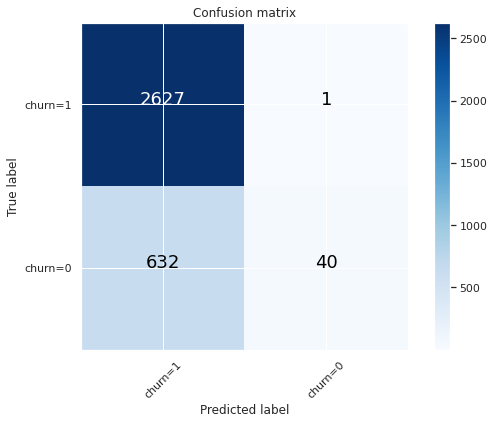

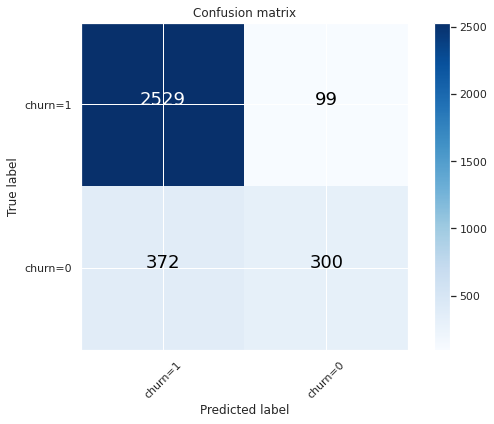

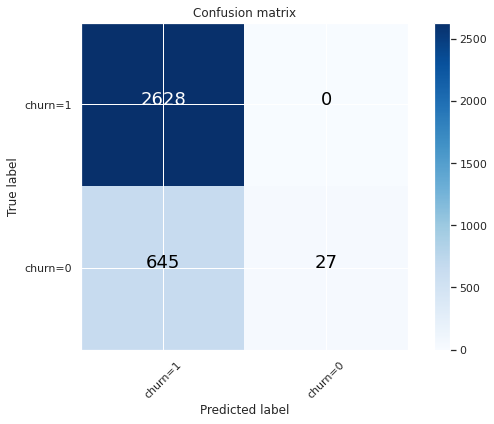

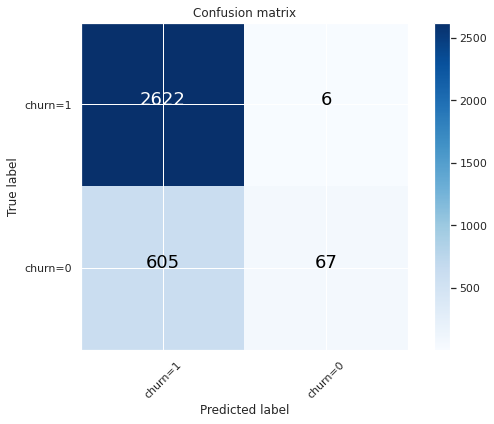

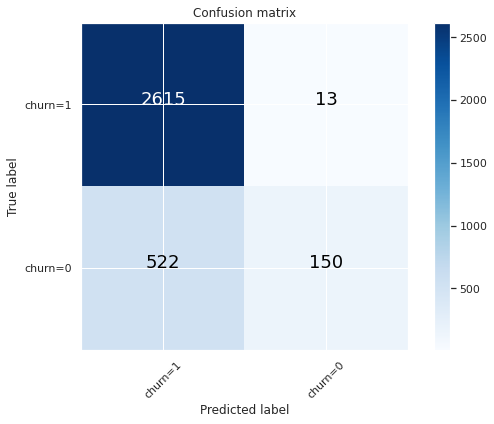

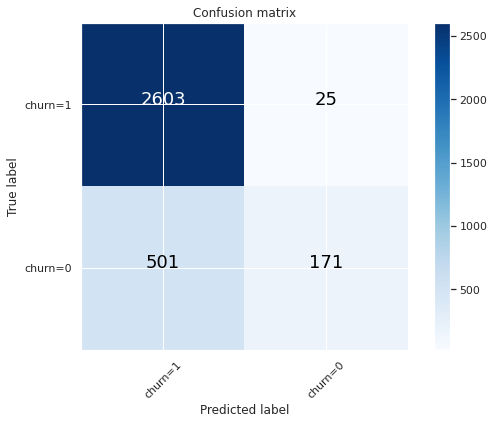

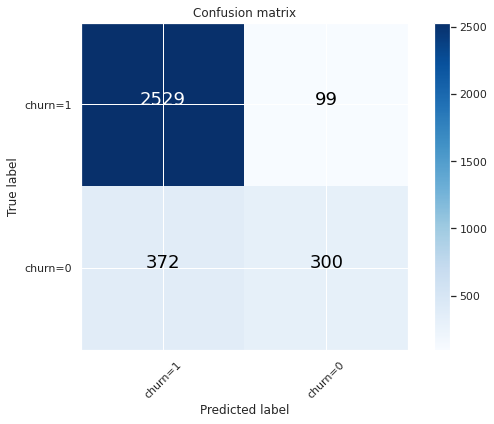

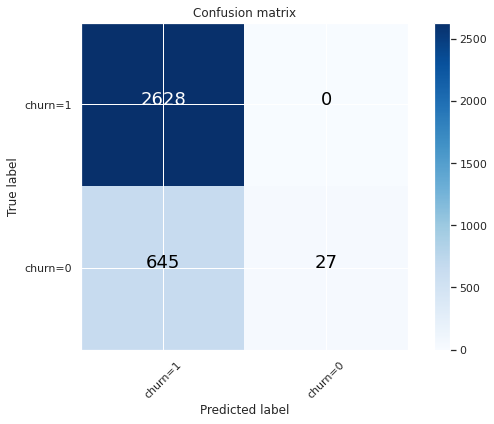

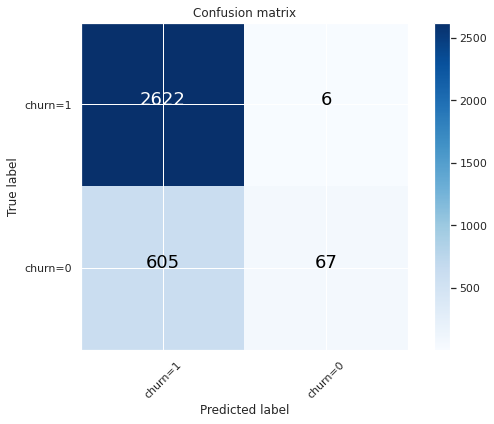

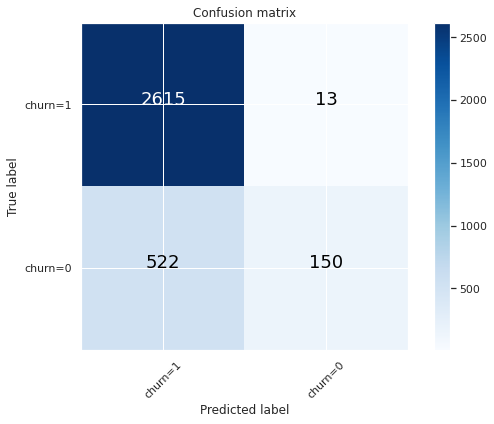

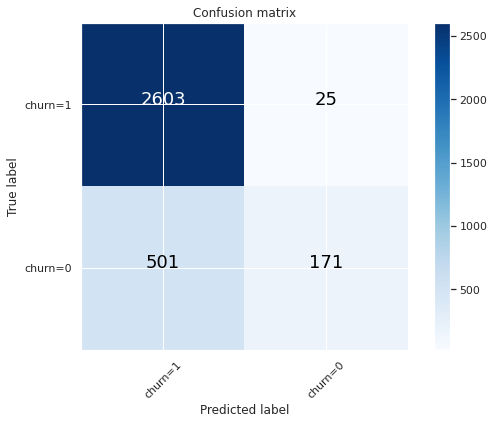

In [36]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2,3,4,5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rnd_clf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rnd_clf.fit(train_data,train_labels)
    prediction_test = rnd_clf.predict(X=test_data)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(test_labels,prediction_test)))
    cm = confusion_matrix(test_labels, prediction_test)
    plt.figure()
    plot_confusion_matrix(cm, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
#     cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
#     plt.figure()
#     plot_confusion_matrix(cm_norm, classes=rnd_clf.classes_,
#     title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(test_labels,prediction_test)))


In [37]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='gpu_hist')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
clf.fit(train_data,train_labels)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=3;, score=0.844 total time=   4.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=3;, score=0.858 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=3;, score=0.871 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=3;, score=0.838 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=3;, score=0.855 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=7;, score=0.847 total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=7;, score=0.862 total time=   0.2s
[CV 3/5] END colsample_

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [38]:
clf.best_params_

{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [39]:
best_model=clf.best_estimator_

Confusion matrix, without normalization
[[2585   43]
 [ 429  243]]


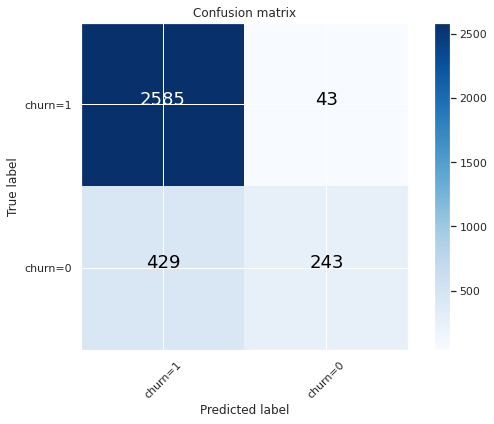

In [40]:
best_model.fit(train_data,train_labels)

pred_xgboost = best_model.predict(test_data)

# Confusion Matrix
cm = confusion_matrix(test_labels, pred_xgboost)
plt.figure()
plot_confusion_matrix(cm, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')



In [41]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)


The True Positive rate / Recall per class is:  [0.98 0.36]
The Precision per class is:  [0.86 0.85]
The False Alarm rate per class is:  [0.64 0.02]
The Miss Rate rate per class is:  [0.02 0.64]
The Classification error of each class is [0.14 0.14]
The Accuracy of each class is [0.86 0.86]

The average Recall is:  0.6726224450967602
The average Precision is:  0.853657291613496
The average False Alarm is:  0.32737755490323983
The average Miss Rate rate is:  0.32737755490323983
The average Classification error is 0.14303030303030304
The average Accuracy is 0.8569696969696969
